In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import glob
import numpy as np


In [2]:
DFS = {}
simtime = [15, 30]
meandeparture = [5, 10]
times = [17068.781, 12885.121, 31545.71, 29819.782]

In [3]:
cases = []
for s in simtime:
    for md in meandeparture:
        cases.append(str(s) + "," + str(md))

In [4]:
len(cases), len(times)

(4, 4)

Text(0.5, 1.0, 'Database')

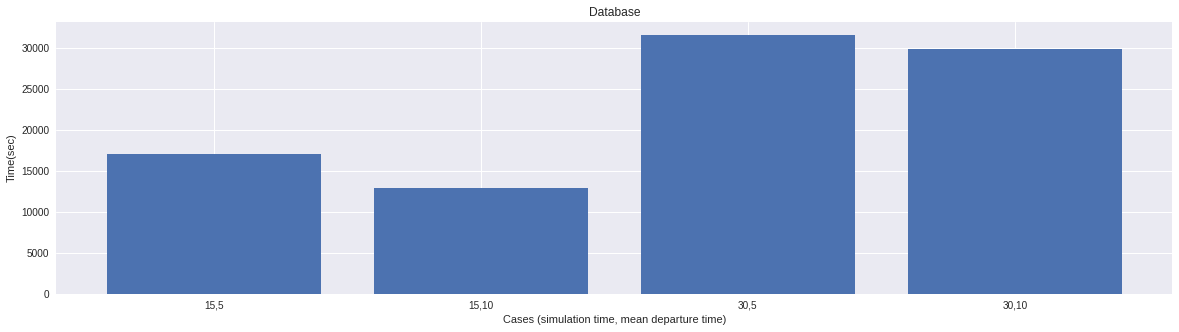

In [5]:
plt.style.use("seaborn")

plt.figure(figsize=(20, 5))
plt.bar(x=cases, height=times)
plt.xlabel("Cases (simulation time, mean departure time)")
plt.ylabel("Time(sec)")
plt.title("Database")

Text(0.5, 1.0, 'Kochi - Learning Curve - ETA: 15 min')

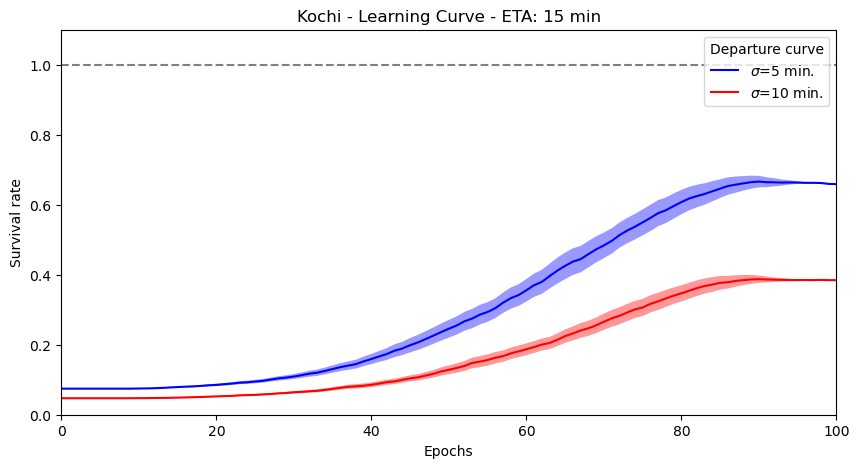

In [6]:
plt.style.use("default")
fig, ax = plt.subplots(figsize=(10, 5))
s = 15
color = ["b", "r"]
ymax = 0
pop = 35930
for md, c in zip([5, 10], color):  # meandeparture:
    folder = f"state_db_ql_mod_{s}_{md}"
    df = pd.read_csv(
        f"../kochi/{folder}/survivorsPerSim_1x100.csv", names=["t", "r"])
    step = 10
    # mean of raw data stepwise
    temp =[df['r'].values[i-step:i].mean() / pop for i in range(step,len(df['r'])+1)]
    temp2 = [temp[0]]*(step-1)
    df['rr'] = temp2 + temp
    # std stepwise
    temp =[df['rr'].values[i-step:i].std() for i in range(step,len(df['rr'])+1)]
    temp2 = [temp[0]]*(step-1)
    df['std'] = temp2 + temp
    # upper and lower bounds
    df["upb"] = [x + y for x, y in zip(df["rr"], df["std"])]
    df["lwb"] = [x - y for x, y in zip(df["rr"], df["std"])]
    # plots
    # df['upb'].plot(ax=ax,color=c,marker=None,ls=None,alpha=0.4)
    df["rr"].plot(ax=ax, color=c, marker=None,
                  ls="-", label=f"$\sigma$={md} min.")
    # df["mean"].plot( ax=ax, color=c, marker=None, ls="-", label=f"$\sigma_{{mean}}$={md}" )
    # df['std'].plot(ax=ax,color=c,marker=None,ls='-',label=f'$\sigma$={md}',alpha=0.4)
    # df['lwb'].plot(ax=ax,color=c,marker=None,ls=None,alpha=0.4)
    ax.fill_between(df.index.tolist(),
                    df["upb"], df["lwb"], facecolor=c, alpha=0.4)
    ymax = max([df['upb'].max(), ymax])
leg = plt.legend(title='Departure curve')
leg.get_title().set_fontsize("10")
plt.hlines(1,0,10000,ls='--',color='k',alpha=0.5)
plt.ylim(0,1.1) #ymax
plt.xlim(0,100)
plt.xlabel('Epochs')
plt.ylabel('Survival rate')
plt.title(f'Kochi - Learning Curve - ETA: {s} min')
# plt.text(20,15000,'Computation time: ', fontsize='small')
# plt.savefig('./kochi_raw_in_epochs.png',dpi=300)


Text(0.5, 1.0, 'Kochi - Learning Curve - ETA: 30 min')

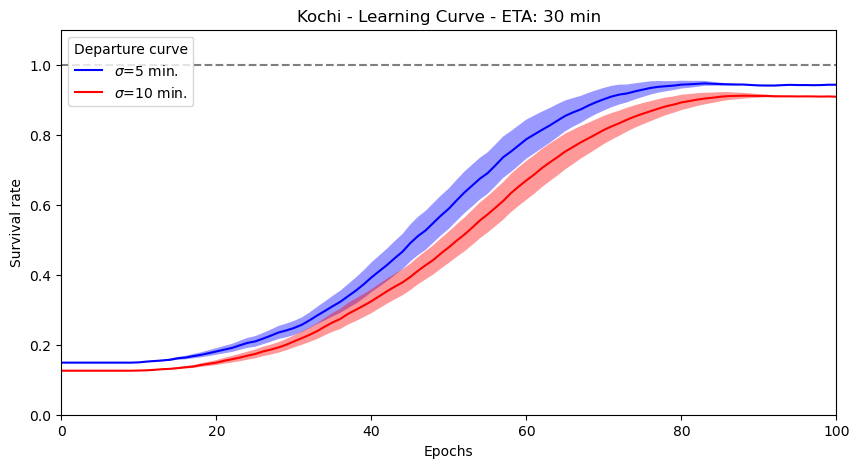

In [9]:
plt.style.use("default")
fig, ax = plt.subplots(figsize=(10, 5))
s = 30
color = ["b", "r"]
ymax = 0
pop = 35930
for md, c in zip([5, 10], color):  # meandeparture:
    folder = f"state_db_ql_mod_{s}_{md}"
    df = pd.read_csv(
        f"../kochi/{folder}/survivorsPerSim_1x100.csv", names=["t", "r"])
    step = 10
    # mean of raw data stepwise
    temp =[df['r'].values[i-step:i].mean() / pop for i in range(step,len(df['r'])+1)]
    temp2 = [temp[0]]*(step-1)
    df['rr'] = temp2 + temp
    # std stepwise
    temp =[df['rr'].values[i-step:i].std() for i in range(step,len(df['rr'])+1)]
    temp2 = [temp[0]]*(step-1)
    df['std'] = temp2 + temp
    # upper and lower bounds
    df["upb"] = [x + y for x, y in zip(df["rr"], df["std"])]
    df["lwb"] = [x - y for x, y in zip(df["rr"], df["std"])]
    # plots
    # df['upb'].plot(ax=ax,color=c,marker=None,ls=None,alpha=0.4)
    df["rr"].plot(ax=ax, color=c, marker=None,
                  ls="-", label=f"$\sigma$={md} min.")
    # df["mean"].plot( ax=ax, color=c, marker=None, ls="-", label=f"$\sigma_{{mean}}$={md}" )
    # df['std'].plot(ax=ax,color=c,marker=None,ls='-',label=f'$\sigma$={md}',alpha=0.4)
    # df['lwb'].plot(ax=ax,color=c,marker=None,ls=None,alpha=0.4)
    ax.fill_between(df.index.tolist(),
                    df["upb"], df["lwb"], facecolor=c, alpha=0.4)
    ymax = max([df['upb'].max(), ymax])
leg = plt.legend(title='Departure curve')
leg.get_title().set_fontsize("10")
plt.hlines(1,0,10000,ls='--',color='k',alpha=0.5)
plt.ylim(0,1.1) #ymax
plt.xlim(0,100)
plt.xlabel('Epochs')
plt.ylabel('Survival rate')
plt.title(f'Kochi - Learning Curve - ETA: {s} min')
# plt.text(20,15000,'Computation time: ', fontsize='small')
# plt.savefig('./kochi_raw_in_epochs.png',dpi=300)


In [10]:
number = 11
cmap = plt.get_cmap("jet")
colors = [cmap(i) for i in np.linspace(0, 1, number)]

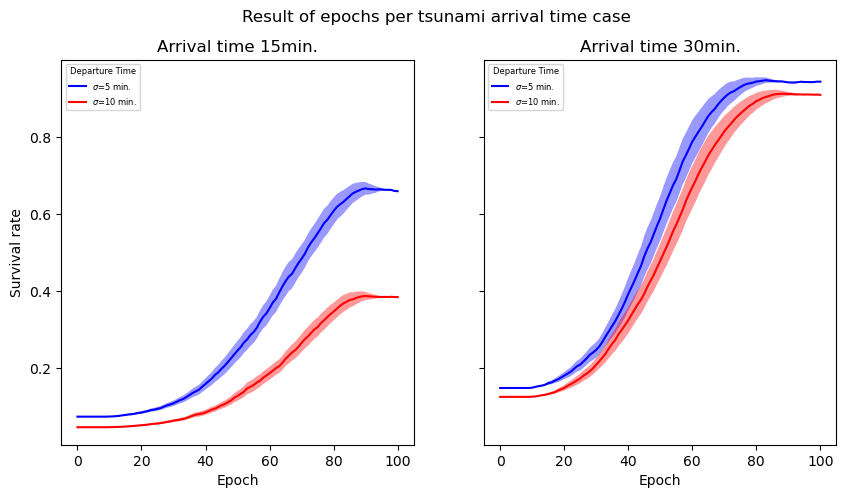

In [12]:
pop = 35930
color = ['b', 'r']
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
for ax, s in list(zip(axs, [15, 30])):
    for c, md in zip(color, [5, 10]):  # meandeparture:
        folder = f"state_db_ql_mod_{s}_{md}"
        df = pd.read_csv(
            f"../kochi/{folder}/survivorsPerSim_1x100.csv", names=["t", "r"]
        )
        step = 10
        # mean of raw data stepwise
        temp =[df['r'].values[i-step:i].mean() / pop for i in range(step,len(df['r'])+1)]
        temp2 = [temp[0]]*(step-1)
        df['rr'] = temp2 + temp
        # std stepwise
        temp =[df['rr'].values[i-step:i].std() for i in range(step,len(df['rr'])+1)]
        temp2 = [temp[0]]*(step-1)
        df['std'] = temp2 + temp
        # upper and lower bounds
        df["upb"] = [x + y for x, y in zip(df["rr"], df["std"])]
        df["lwb"] = [x - y for x, y in zip(df["rr"], df["std"])]
        # plots
        # df['upb'].plot(ax=ax,color=c,marker=None,ls=None,alpha=0.4)
        df["rr"].plot(ax=ax, color=c, marker=None,
                    ls="-", label=f"$\sigma$={md} min.")
        # df['lwb'].plot(ax=ax,color=c,marker=None,ls=None,alpha=0.4)
        ax.fill_between(df.index.tolist(),
                        df["upb"], df["lwb"], facecolor=c, alpha=0.4)
        # plt.ylim(0,3000)
        # ax.hlines(2723,0,100,ls='--',lw=0.5,color='k')
        leg = ax.legend(loc=2, prop={"size": 6}, title="Departure Time")
        leg.get_title().set_fontsize("6")
        ax.set_title(f"Arrival time {s}min.")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Survival rate")
        fig.suptitle("Result of epochs per tsunami arrival time case")


In [13]:
best_policies_last10 = {}
best_policies_all = {}
for s in [15, 30]:
    best_policies_last10[str(s)] = []
    best_policies_all[str(s)] = []
    for md in [5, 10]:  # meandeparture:
        folder = f"state_db_ql_mod_{s}_{md}"
        df = pd.read_csv(
            f"../kochi/{folder}/survivorsPerSim_1x100.csv", names=["t", "r"]
        )
        best_policies_last10[str(s)].append(df["r"][-21:].idxmax())
        best_policies_all[str(s)].append(df["r"].idxmax())

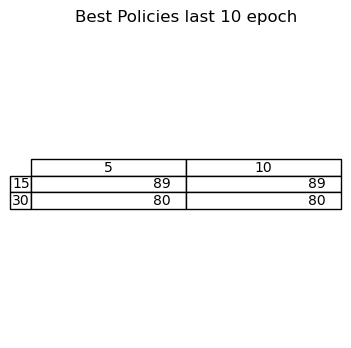

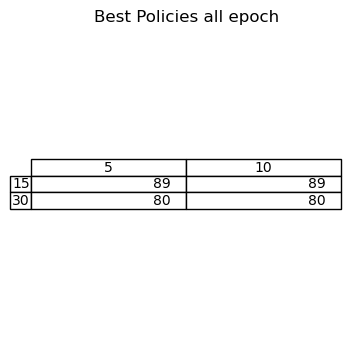

In [14]:
for txt, bp in zip(['last 10','all'],[best_policies_last10, best_policies_all]):
    rows = list(bp)
    cell_text = list(bp.values())
    columns = [str(a) for a in [5, 10]]
    fig, axs = plt.subplots(1, 1, figsize=(4, 4))
    axs.axis("tight")
    axs.axis("off")
    plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc="center")
    plt.title(f"Best Policies {txt} epoch")


In [15]:
dfs = {}
best_case = [[89,89],[80,80]]
j = 0
for i, s in enumerate([15, 30]):
    for case, md in zip(best_case[i], [5, 10]):
        print(f"Case {j} : {s}-{md}-{case}")
        try:
            dfs[j] = pd.read_csv(f'../results/survivor-time_kochi_{s*60}_{md*60}.csv',names=['t','e'])
            j += 1
        except:
            pass

Case 0 : 15-5-89
Case 1 : 15-10-89
Case 2 : 30-5-80
Case 3 : 30-10-80


In [16]:
new_dfs = {}
try:
    for i, df in enumerate(dfs.values()):
        new_dfs[i] = df.loc[~(df==0).all(axis=1)]
except:
    pass

In [17]:
len(dfs)

4

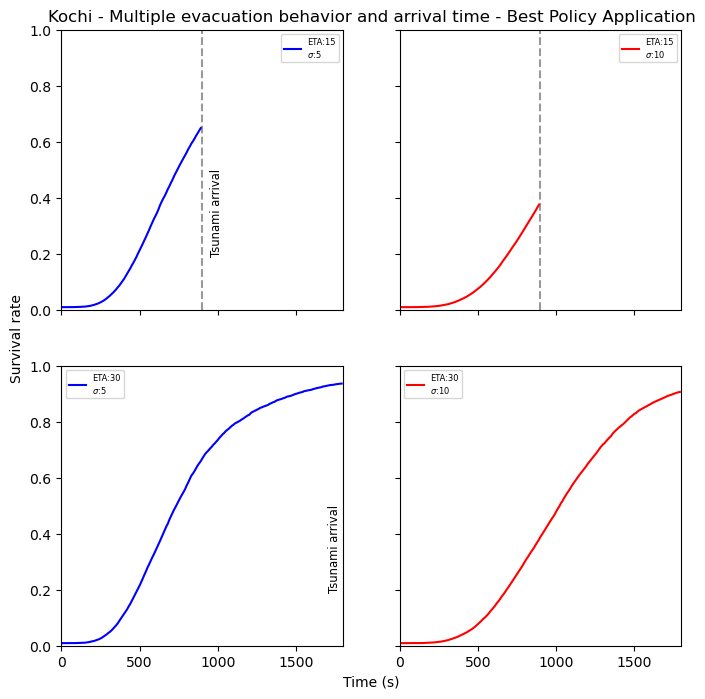

In [20]:
cmap = plt.get_cmap("jet")
colors = ['b','b','b','b','b','b','r','r','r','r','r']#[cmap(i) for i in np.linspace(0, 1, 11)]
fig, axs = plt.subplots(2,2,sharex=True,sharey=True,figsize=(8,8))
plt.xlim(0,1800)
plt.ylim(0,1)
m = 0
s = [15,30]
md = [5, 10]
pop = 35930
try:
    for i, axv in enumerate(axs):
        for j, ax in enumerate(axv):
            x = new_dfs[m]['t'].to_list()
            y = [ a / pop for a in new_dfs[m]['e'].to_list() ]
            if i != 1:
                xv = s[i]*60
                ax.vlines(xv,0,1,ls='--',color='k',alpha=0.4)
                if j == 0:
                    ax.text(xv+50,0.2,'Tsunami arrival',rotation='vertical',fontsize='small')
            if i == 1 and j == 0:
                xv = s[i]*60
                ax.text(xv-100,0.2,'Tsunami arrival',rotation='vertical',fontsize='small') 
            ax.plot(x,y,lw=1.5,c=colors[md[j]],label=f'ETA:{s[i]}\n$\sigma$:{md[j]}')
            ax.legend(prop={'size':6})
            m += 1
except:
    pass

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.title('Kochi - Multiple evacuation behavior and arrival time - Best Policy Application')
plt.xlabel("Time (s)")
plt.ylabel("Survival rate");
# plt.savefig('./kochi_bestpolicy_test.png',dpi=300);